In [2]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from matplotlib.colors import LogNorm

from glob import glob
import os, sys, pickle, requests

sys.path.append('../../ChemMapping/scripts')
import RDAT_utils as utils
import plot_utils as eb_plot

Populating the interactive namespace from numpy and matplotlib


In [10]:
outdir = '../figures'

# load in data
data = pd.read_json('../data/full_df_window500_full_output_06Apr2020.json.zip')

#remove denatured data
data = data.loc[~data['info'].str.contains('denatured')]
# #remove other modifiers
# data = data.loc[~data['info'].str.contains('moU')]
# data = data.loc[~data['info'].str.contains('mpU')]

In [11]:
data['info'].replace('Mauger,2019 U.*nLUC mRNA','Mauger,2019 nLUC mRNA',inplace=True,regex=True)
data['info'].replace('Mauger,2019 moU.*nLUC mRNA','Mauger,2019 moU-nLUC mRNA',inplace=True,regex=True)
data['info'].replace('Mauger,2019 mpU.*nLUC mRNA','Mauger,2019 mpU-nLUC mRNA',inplace=True,regex=True)
data['info'].replace('Simon,2019 Ecoli invitro .*','Simon,2019 Ecoli invitro',inplace=True,regex=True)
data['info'].replace('Simon,2019 Ecoli exvivo .*','Simon,2019 Ecoli exvivo',inplace=True,regex=True)
data['info'].replace('Simon,2019 Invitro .*','Simon,2019 Influenza invitro',inplace=True,regex=True)
data['info'].replace('Simon,2019 Invivo .*','Simon,2019 Influenza invivo',inplace=True,regex=True)

data.replace('T','U',inplace=True)

In [13]:
correlation_data = pd.DataFrame()

for dataset in data['info'].unique():
    
    print('Analyzing %s' % dataset)
    tmp_data = data.loc[data['info']==dataset]
    tmp_concat_data = utils.write_concatenated_dataframe(tmp_data)
    tmp_concat_data.replace('T','U',inplace=True)
    
    # filter reactivity outliers
    tmp_concat_data = utils.filter_data(tmp_concat_data)
    
    # remove nucleotides preceded by 6 (or more) A's
    
    tmp_concat_data = tmp_concat_data.loc[tmp_concat_data['in_polyA']==0]
    tmp_concat_data = tmp_concat_data.reset_index()

    corr_data = utils.get_correlations(tmp_concat_data, split_by_nucleotides=False, n_bootstraps=100)
    corr_data['info'] = dataset
    corr_data['dataset_n_nucleotides'] = len(tmp_concat_data)
    corr_data['dataset_n_constructs'] = len(data.loc[data['info']==dataset])
    #corr_data['mean_signal_to_noise'] = np.mean(tmp_concat_data['signal_to_noise'])
    corr_data['reactivity_mean'] = np.mean(tmp_concat_data['reactivity'])
    corr_data['reactivity_std'] = np.std(tmp_concat_data['reactivity'])
    corr_data['reactivity_95perc'] = np.percentile(tmp_concat_data['reactivity'],95)

    correlation_data = correlation_data.append(corr_data,ignore_index=True)


Analyzing Mauger,2019 nLUC mRNA


../../ChemMapping/scripts/RDAT_utils.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trimmed_sequence'] = df.apply(lambda row: [list(row['sequence'])[x] for x in row['seqpos'] if x < len(row['sequence'])], axis=1)
../../ChemMapping/scripts/RDAT_utils.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_polyA'] = df.apply(lambda row: get_polyA_indicator(row, polyA_len=6), axis=1)
../../ChemMapping/scripts/RDAT_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

n_constructs 156
14706 of 73710 nucleotides removed, 0.20, cutoff = 1.45
Analyzing Mauger,2019 mpU-nLUC mRNA
n_constructs 156
14791 of 73710 nucleotides removed, 0.20, cutoff = 1.53
Analyzing Mauger,2019 moU-nLUC mRNA
n_constructs 156
12308 of 73710 nucleotides removed, 0.17, cutoff = 1.41
Analyzing Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE
n_constructs 20
911 of 9646 nucleotides removed, 0.09, cutoff = 1.01
Analyzing Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender
n_constructs 20
1110 of 9648 nucleotides removed, 0.12, cutoff = 1.52
Analyzing Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 20
1497 of 9648 nucleotides removed, 0.16, cutoff = 1.64
Analyzing Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 21
2163 of 10147 nucleotides removed, 0.21, cutoff = 1.74
Analyzing Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.
n_constructs 20
1453 of 9642 nucleotides removed, 0.15, cutoff = 1.57
Analyzing Watters,2018 CMV SHAPE-seq
n_constructs 5
1012 of

/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Analyzing Simon,2019 Ecoli invitro
n_constructs 11
2533 of 4671 nucleotides removed, 0.54, cutoff = 0.02
Analyzing Simon,2019 Ecoli exvivo
n_constructs 22
5066 of 9342 nucleotides removed, 0.54, cutoff = 0.08
Analyzing Simon,2019 Influenza invivo
n_constructs 62
14207 of 28074 nucleotides removed, 0.51, cutoff = 0.06
Analyzing Simon,2019 Influenza invitro
n_constructs 62
14186 of 28074 nucleotides removed, 0.51, cutoff = 0.05


In [14]:
plotting_names = {
                  'Watts,2009 HIV-1 SHAPE(NMIA) SSIII CE': 'Watts, HIV-1, SHAPE-CE, 2009',
'Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut. from Lavender': 'Siegfried, HIV-1 Mut, SHAPE, 2014',
'Siegfried,2014 HIV-1 SHAPE(1M7) SSII-Mn(2+) Mut.': 'Siegfried, HIV-1, SHAPE, 2014',
'Lavender,2015 SIV mac SHAPE(1M7) SSII-Mn(2+) Mut.': 'Lavender, SIV mac, SHAPE-MaP, 2015',
'Lavender,2015 SIV cpz SHAPE(1M7) SSII-Mn(2+) Mut.': 'Lavender, SIV cpz, SHAPE-MaP, 2015',
'Watters,2018 CMV SHAPE-seq': 'Watters, CMV, SHAPE-MaP, 2018',
'Kutchko,2018 alphavirus SHAPE(1M7) SSII-Mn(2+) Mut.': 'Kutchko, Alphavirus, SHAPE-MaP, 2018',
'Dadonaite,2019 Influenza genome SHAPE(1M7) SSII-Mn(2+) Mut.': 'Dadonaite, Influenza A, SHAPE-MaP, 2019',
'Simon,2019 Ecoli invitro': 'Simon, E. coli rRNA in vitro, DMS-MaP-Seq, 2019',
'Simon,2019 Ecoli exvivo': 'Simon, E. coli rRNA ex vivo, DMS-MaP-Seq, 2019',
'Simon,2019 Influenza invivo':'Simon, Influenza A in vivo, DMS-MaP-Seq, 2019',
'Simon,2019 Influenza invitro':'Simon, Influenza A in vitro, DMS-MaP-Seq, 2019',
'Mauger,2019 nLUC mRNA':'Mauger, Luc mRNA, SHAPE, 2019',
'Mauger,2019 moU-nLUC mRNA':'Mauger, Luc mRNA (moU), SHAPE, 2019',
'Mauger,2019 mpU-nLUC mRNA':'Mauger, Luc mRNA (mpU), SHAPE, 2019'}

correlation_data['plot_name'] = [plotting_names[x] for x in correlation_data['info']]

In [15]:
plot_order=['Watts, HIV-1, SHAPE-CE, 2009', 'Siegfried, HIV-1 Mut, SHAPE, 2014',
            'Siegfried, HIV-1, SHAPE, 2014', 'Lavender, SIV mac, SHAPE-MaP, 2015',
            'Lavender, SIV cpz, SHAPE-MaP, 2015', 'Watters, CMV, SHAPE-MaP, 2018',
            'Kutchko, Alphavirus, SHAPE-MaP, 2018', 'Dadonaite, Influenza A, SHAPE-MaP, 2019',
            'Simon, E. coli rRNA in vitro, DMS-MaP-Seq, 2019', 'Simon, E. coli rRNA ex vivo, DMS-MaP-Seq, 2019',
            'Simon, Influenza A in vivo, DMS-MaP-Seq, 2019',
             'Simon, Influenza A in vitro, DMS-MaP-Seq, 2019', 'Mauger, Luc mRNA, SHAPE, 2019',
            'Mauger, Luc mRNA (moU), SHAPE, 2019','Mauger, Luc mRNA (mpU), SHAPE, 2019',
           'Jarmoskaite, PUM-RNA, 2019']

In [16]:
example_package_list = ['vienna_2', 'nupack_99','rnastructure','contrafold_2','rnasoft_blstar', 'eternafold_B']

## Compute correlation between data and package predictions, over all the cloud lab data

In [50]:
pum_df = pd.read_clipboard()

In [32]:
pum_df['plot_name'] = 'Jarmoskaite, PUM-RNA, 2019'
correlation_data.replace('eternafold', 'eternafold_B',inplace=True)
correlation_data.replace('contrafold', 'contrafold_2', inplace=True)

In [26]:
correlation_data = correlation_data.append(pum_df, ignore_index=True)

/Users/hwayment/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


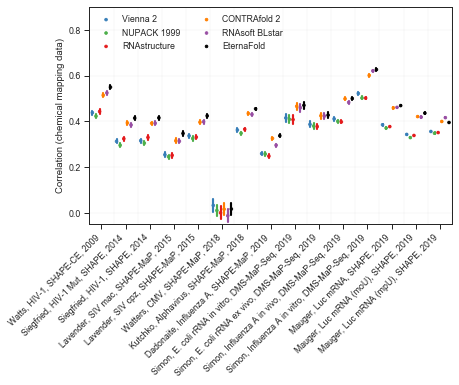

In [33]:
figure(figsize=(6.5,4))

titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]] #[[218/255,165/255,32/255]] # last is gold for eternafold

g = sns.pointplot(x='plot_name', y='Corr', data=correlation_data, hue='package', order=plot_order[:-1],
                      join=False, ci='sd', marker='.', scale=0.5, dodge=0.75, palette=standardized_palette)
ylabel('Correlation (chemical mapping data)')
legend(frameon=False,loc='upper left',ncol=2)
leg = g.get_legend()
for t, l in zip(leg.texts, titles): t.set_text(l)

for x in range(0,15,1):
    axvline(x+0.5,zorder=0,color='grey',linewidth=0.2,alpha=0.3)
    
for x in [0, 0.2, 0.4,0.6,0.8]:
    axhline(x, zorder=0,color='grey',linewidth=0.2,alpha=0.3)
ylim([-0.05,0.9])
#grid(linewidth=0.2)
xlabel('')
xticks(rotation=45,horizontalalignment='right')

savefig('correlation_by_dataset_+eternafold.pdf', bbox_inches='tight',transparent=True)


In [80]:
! open -a "Adobe Illustrator" protein_panel.pdf

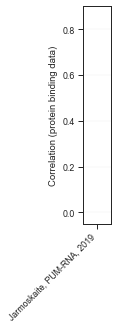

In [34]:
figure(figsize=(0.5,4))

titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]] #[[218/255,165/255,32/255]] # last is gold for eternafold

g = sns.pointplot(x='plot_name', y='Corr', data=correlation_data, hue='package', order=[plot_order[-1]],
                      join=False, ci='sd', marker='.', scale=0.5, dodge=0.5, palette=standardized_palette)
ylabel('Correlation (protein binding data)')
legend([], frameon=False)

for x in [0, 0.2, 0.4,0.6,0.8]:
    axhline(x, zorder=0,color='grey',linewidth=0.2,alpha=0.3)

xlabel('')
ylim([-0.05,0.9])

xticks(rotation=45,horizontalalignment='right')

savefig('protein_panel.pdf', bbox_inches='tight',transparent=True)



In [51]:
from sci
pum_df.groupby('package').mean()

,Corr,RMSE
package,,
contrafold,0.78212,0.72206
eternafold,0.77592,0.70306
vienna_2,0.79760,0.72283


In [52]:
pum_df.groupby('package').std()

,Corr,RMSE
package,,
contrafold,0.013318,0.022190
eternafold,0.013523,0.023934
vienna_2,0.013842,0.020584


In [16]:
from scipy.stats import ttest_ind

def get_pairwise_significance(corr_df, metric='Corr', package_list = None):

    sort_order = ['vienna', 'nupack','rnastructure','contrafold','rnasoft','eternafold']
    
    corr_df['package_type'] = corr_df.apply(lambda row: row['package'].split('_')[0], axis=1)

    new_cdf = pd.DataFrame()
    
    for pkg in sort_order:
        tmp_df = corr_df.loc[corr_df['package_type']==pkg]
        new_cdf = new_cdf.append(tmp_df, ignore_index = True)
        
    corr_df = new_cdf
    
    if not package_list:
        package_list = corr_df['package'].unique()
        
    pval_matrix = np.zeros([len(package_list),len(package_list)])
            
    for i, pkg_1 in enumerate(package_list):
        for j, pkg_2 in enumerate(package_list[i+1:]):
            dists = corr_df.loc[corr_df['package']==pkg_1]['Corr'].values\
            - corr_df.loc[corr_df['package']==pkg_2]['Corr'].values
#             stat, pval = ttest_ind(corr_df.loc[corr_df['package']==pkg_1]['Corr'],
#                   corr_df.loc[corr_df['package']==pkg_2]['Corr'], equal_var=False)
            
#             mean1=np.mean(corr_df.loc[corr_df['package']==pkg_1]['Corr'])
#             mean2=np.mean(corr_df.loc[corr_df['package']==pkg_2]['Corr'])

            dists = np.arctan(dists)
            SE = (np.percentile(dists,95) - np.percentile(dists,5))/(2*1.96)
            z = np.mean(dists)/SE
            if np.abs(z) > 2.576:
                if z>0:
                    pval_matrix[i,j+i+1] += 1
                    pval_matrix[j+i+1,i] -= 1

                else:
                    pval_matrix[i,j+i+1] -= 1        
                    pval_matrix[j+i+1,i] += 1
                

            if np.abs(z) > 3.090: #1.645:
                if z>0:
                    pval_matrix[i,j+i+1] += 1
                    pval_matrix[j+i+1,i] -= 1

                else:
                    pval_matrix[i,j+i+1] -= 1        
                    pval_matrix[j+i+1,i] += 1

            if np.abs(z) > 3.291: #2.576:
                if z>0:
                    pval_matrix[i,j+i+1] += 1
                    pval_matrix[j+i+1,i] -= 1

                else:
                    pval_matrix[i,j+i+1] -= 1
                    pval_matrix[j+i+1,i] += 1
                    
    imshow(pval_matrix,cmap='seismic', origin='lower',vmin=-4,vmax=4)
    xticks([x for x in range(len(package_list))], package_list, rotation=45, horizontalalignment='right')
    yticks([x for x in range(len(package_list))], package_list)


    plot([-0.5,len(package_list)-0.5],[-0.5,len(package_list)-0.5],color='k')
    cbar = colorbar(fraction=0.07, aspect=6)
    cbar.set_ticks([-3,-2,-1,1,2,3])
    cbar.set_ticklabels(['p<0.01, A','p<0.05, A','p<0.1, A','p<0.1, B','p<0.05, B','p<0.01, B'])
    xlabel('Package A')
    ylabel('Package B')

    return pval_matrix

/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/hwayment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

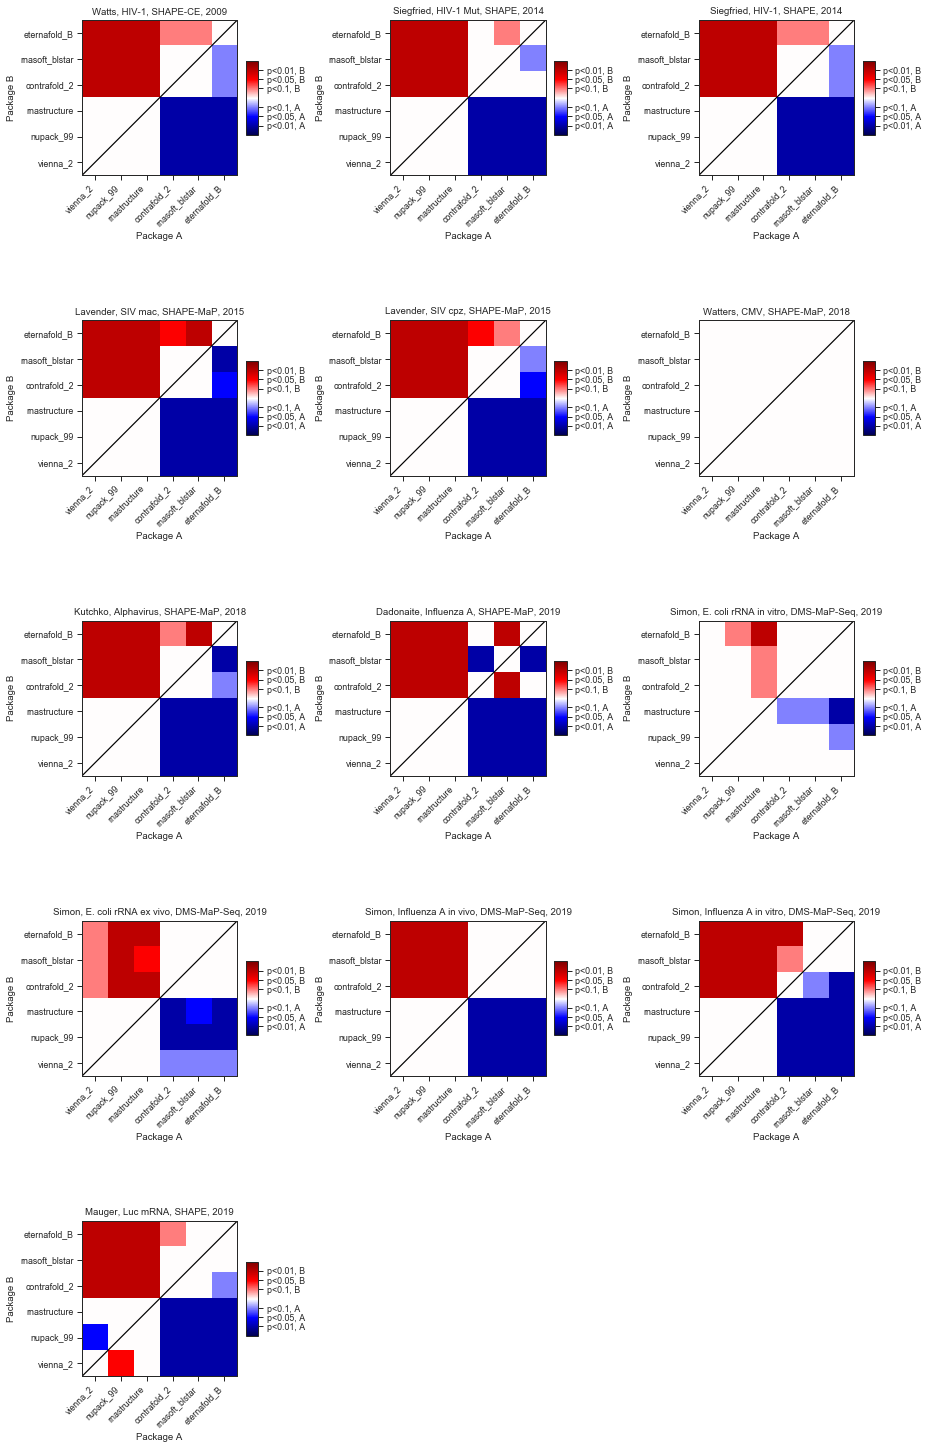

In [17]:
figure(figsize=(4*3+1, 4*5+1))
for i,dat in enumerate(plot_order[:-1]):
    subplot(5,3,i+1)
    title(dat)
    p = get_pairwise_significance(correlation_data.loc[correlation_data['plot_name']==dat])
tight_layout()
#savefig('%s/pvals_all.pdf' % (outdir),bbox_inches='tight')

watts_2009_hiv_CE
siegfried_2014_hiv
siegfried_2014_hiv0
lavender_2015_sivmac
lavender_2015_sivcpz
watters_2018_cmv
kutchko_2018_alpha
dadonaite_2019_influenza


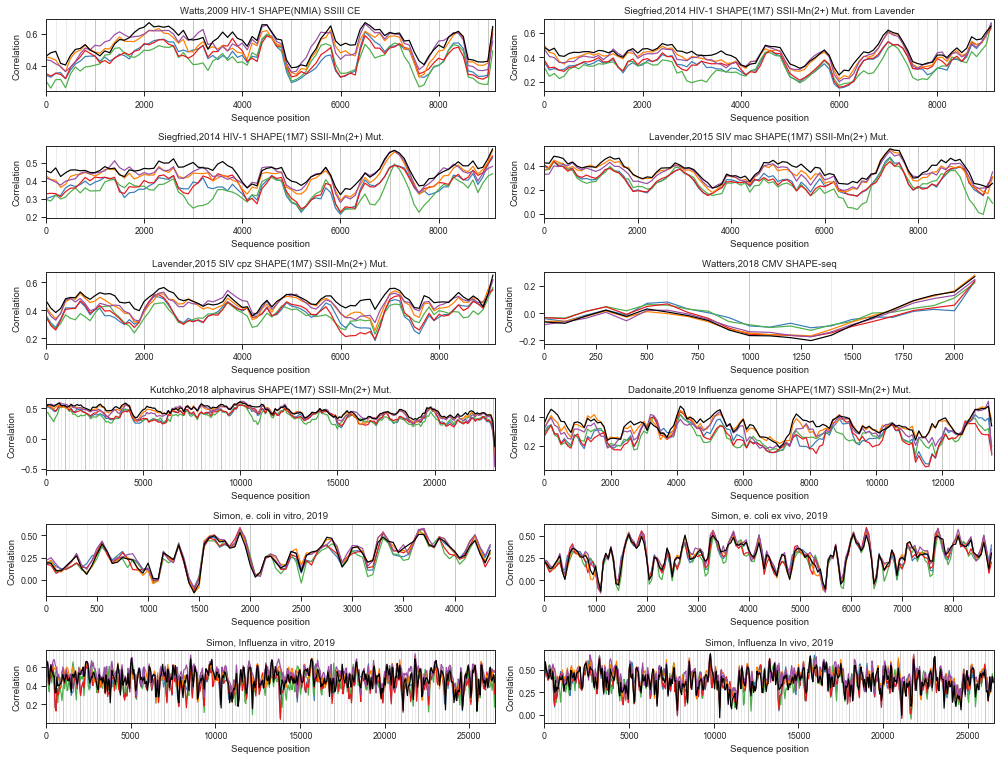

In [74]:
ctr=1
figure(figsize=(14,12))
for identifier in data['ID'].unique():
    if '_L' not in identifier and 'rep2' not in identifier and 'Invivo' not in identifier\
    and 'Invitro' not in identifier and '_exvivo' not in identifier and '_invitro' not in identifier:
        print(identifier)
        
        subplot(7,2,ctr)

        r=[]

        n_windows = len(data.loc[data['ID']==identifier])
        tmp_pal=sns.color_palette('Set1',5)
        standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]
        

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


        for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                                'contrafold_2','rnasoft_blstar','eternafold_B']):
            p_dat=[]
            xs, ys=[],[]
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat.extend(np.clip(tmp,0,100)[:-25])

            for window_start in range(0,len(r),100):
                window_end = np.min([window_start+500,len(r)])
                xs.append(window_start)
                ys.append(np.corrcoef(r[window_start:window_end],
                                                  p_dat[window_start:window_end])[0][1])

            plot(xs,ys,c=standardized_palette[j],label=pkg)

        for x in range(0,len(r),200):
            axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

        for x in range(0,len(r),1000):
            axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

        xlabel('Sequence position')
        ylabel('Correlation')
        xlim([0,len(r)])
        #titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
        #legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
        title(data.loc[data['ID']==identifier]['info'].unique()[0])
        ctr+=1
        
subplot(7,2,ctr)

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if '_invitro' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, e. coli in vitro, 2019')

ctr+=1
subplot(7,2,ctr)

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if '_exvivo' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, e. coli ex vivo, 2019')
ctr+=1
subplot(7,2,ctr)

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if 'Invitro' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, Influenza in vitro, 2019')

ctr+=1
subplot(7,2,ctr)

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if 'Invivo' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, Influenza In vivo, 2019')


tight_layout()
savefig('all_correlation_profiles.pdf',bbox_inches='tight',transparent=True)


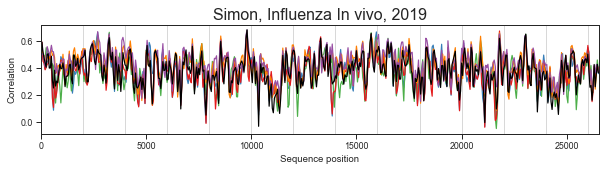

In [60]:
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]
figure(figsize=(20,))
packages=['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if 'Invivo' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),2000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, Influenza In vivo, 2019',fontsize=16)
savefig('simon_invivo.pdf',bbox_inches='tight',transparent=True)

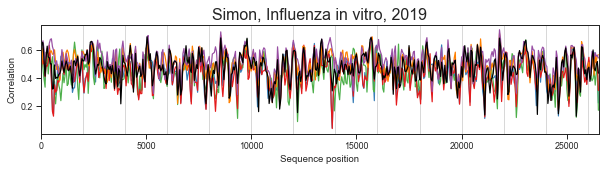

In [61]:
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]
figure(figsize=(10,2))
packages=['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']

p_dat = {k:[] for k in packages}
r=[]
for identifier in data['ID'].unique():
    if 'Invitro' in identifier:
        
        n_windows = len(data.loc[data['ID']==identifier])

        for i in range(n_windows):
            tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
            r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

        for j, pkg in enumerate(packages):
            for i in range(n_windows):

                tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
                p_dat[pkg].extend(np.clip(tmp,0,100)[:-25])

for j, pkg in enumerate(packages):
    xs=[]
    ys=[]
    for window_start in range(0,len(r),50):
        window_end = np.min([window_start+100,len(r)])
        xs.append(window_start)
        ys.append(np.corrcoef(r[window_start:window_end],p_dat[pkg][window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
        
for x in range(0,len(r),2000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(r)])
title('Simon, Influenza in vitro, 2019',fontsize=16)
savefig('simon_invitro.pdf',bbox_inches='tight',transparent=True)

/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


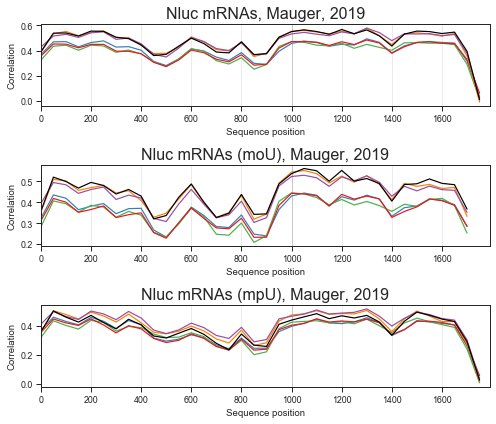

In [78]:
identifiers=['U_L7', 'U_L6', 'U_L4', 'U_L5', 'U_L1', 'U_L2', 'U_L3', 'U_L13', 'U_L12', 'U_L38', 'U_L10', 'U_L11',
 'U_L39', 'U_L15', 'U_L29', 'U_L28', 'U_L14', 'U_L16', 'U_L17', 'U_L32', 'U_L26', 'U_L27', 'U_L33',
 'U_L19', 'U_L25', 'U_L31', 'U_L30', 'U_L24', 'U_L18', 'U_L20', 'U_L34', 'U_L35', 'U_L21', 'U_L37',
 'U_L23', 'U_L22', 'U_L36', 'U_L8', 'U_L9']

n_windows = 4
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(7,6))
packages=['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']
all_data = {k:[] for k in packages}
for identifier in identifiers:
    r = []
    for i in range(n_windows):
        tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
        r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(packages):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(r),50):
            window_end = np.min([window_start+100,len(r)])
            xs.append(window_start)
            ys.append(np.corrcoef(r[window_start:window_end],p_dat[window_start:window_end])[0][1])

        #plot(xs,ys,c=standardized_palette[j],label=pkg)
        all_data[pkg].append(ys)
        
subplot(3,1,1)        
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

for j,pkg in enumerate(packages):
    plot(xs,np.mean(np.array(all_data[pkg]),axis=0),color=standardized_palette[j],label=pkg)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(r)])
title('Nluc mRNAs, Mauger, 2019',fontsize=16)

all_data = {k:[] for k in packages}
for ind in identifiers:
    identifier='mo'+ind
    r = []
    for i in range(n_windows):
        tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
        r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(packages):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(r),50):
            window_end = np.min([window_start+100,len(r)])
            xs.append(window_start)
            ys.append(np.corrcoef(r[window_start:window_end],p_dat[window_start:window_end])[0][1])

        #plot(xs,ys,c=standardized_palette[j],label=pkg)
        all_data[pkg].append(ys)

subplot(3,1,2)
   
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

for j,pkg in enumerate(packages):
    plot(xs,np.mean(np.array(all_data[pkg]),axis=0),color=standardized_palette[j],label=pkg)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(r)])
title('Nluc mRNAs (moU), Mauger, 2019',fontsize=16)

all_data = {k:[] for k in packages}
for ind in identifiers:
    identifier='mp'+ind
    r = []
    for i in range(n_windows):
        tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
        r.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(packages):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(r),50):
            window_end = np.min([window_start+100,len(r)])
            xs.append(window_start)
            ys.append(np.corrcoef(r[window_start:window_end],p_dat[window_start:window_end])[0][1])

        #plot(xs,ys,c=standardized_palette[j],label=pkg)
        all_data[pkg].append(ys)
        
subplot(3,1,3)    
for x in range(0,len(r),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

for x in range(0,len(r),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)

for j,pkg in enumerate(packages):
    plot(xs,np.mean(np.array(all_data[pkg]),axis=0),color=standardized_palette[j],label=pkg)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(r)])
title('Nluc mRNAs (mpU), Mauger, 2019',fontsize=16)
tight_layout()
savefig('nluc_correlation_along_length.pdf',bbox_inches='tight',transparent=True)


/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hwayment/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


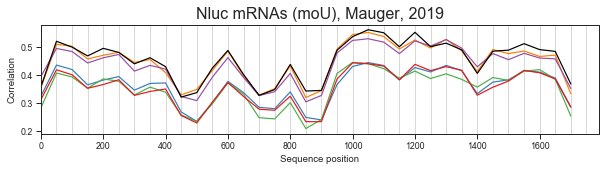

In [54]:
dat=[]

identifier='watts_2009_hiv_CE'

n_windows = len(prob_dat.loc[prob_dat['ID']==identifier])
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(10,2))
for i in range(n_windows):
    tmp = prob_dat.loc[prob_dat['ID']==identifier]['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(n_windows):
        
        tmp = prob_dat.loc[prob_dat['ID']==identifier]['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    for window_start in range(0,len(dat),100):
        window_end = np.min([window_start+500,len(dat)])
        xs.append(window_start)
        ys.append(np.corrcoef(dat[window_start:window_end],
                                          p_dat[window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
    
for x in range(0,len(dat),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)
    
for x in range(0,len(dat),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(dat)])
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
title('Watts, HIV-1, 2009',fontsize=16)
savefig('Watts_HIV1_correlation_profile.pdf',bbox_inches='tight',transparent=True)


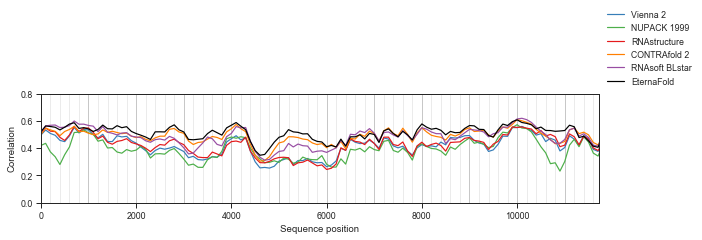

In [88]:
dat=[]

identifier='kutchko_2018_alpha'

n_windows = len(data.loc[data['ID']==identifier])
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(10,2))
for i in range(n_windows):
    tmp = data.loc[data['ID']==identifier]['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(n_windows):
        
        tmp = data.loc[data['ID']==identifier]['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    for window_start in range(0,len(dat),100):
        window_end = np.min([window_start+500,len(dat)])
        xs.append(window_start)
        ys.append(np.corrcoef(dat[window_start:window_end],
                                          p_dat[window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
    
for x in range(0,len(dat),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)
    
for x in range(0,len(dat),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,11717])
ylim([0,0.8])
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
#savefig('kutchko_2018_alpha.pdf',bbox_inches='tight',transparent=True)


In [86]:
! open -a "Adobe Illustrator" kutchko_2018_alpha.pdf